# CSE 252B: Computer Vision II, Winter 2018 – Assignment 5
### Instructor: Ben Ochoa
### Due: Wednesday, March 21, 2018, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX. Remember to show work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. Ask the instructor if in doubt.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Point on line closest to the origin (5 points)
  Given a line $\boldsymbol{l} = (a, b, c)^\top$, show that the point on
  $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ (hint: this calculation is needed in the
  two-view optimal triangulation method used below).

The normal vector for the line $\boldsymbol{l}$ is $\boldsymbol{n}^T = (a,b)$. For a point $\boldsymbol{x} = (x,y,w)^T$, any other point on the normal vector $\boldsymbol{n}$ direction could be expressed as $\boldsymbol{x'} = (x+aw,y+bw,w)^T$.

Then the line which is orthogonal to line $\boldsymbol{l}$ and through point $\boldsymbol{x}$ could be expressed as:
$$\boldsymbol{l'} = \boldsymbol{x}\times\boldsymbol{x'} = (-bw,aw,bx-ay)^T$$

Therefore, the point $\boldsymbol{x}_\boldsymbol{l}$ on line $\boldsymbol{l}$ which is closest to $\boldsymbol{x}$ is the intersection of line $\boldsymbol{l}$ and line $\boldsymbol{l'}$. And it could be calculated as:
$$\boldsymbol{x}_\boldsymbol{l} = \boldsymbol{l}\times\boldsymbol{l'} = \left[
 \begin{array}{c}
   b^2x-aby-acw \\
   a^2y-abx-bcw \\
   (a^2+b^2)w \\
 \end{array}
\right]$$

Thus, if $\boldsymbol{x} = (0,0,1)^T$ which is the origin, the point on $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x}_\boldsymbol{l} = (-ac, -bc, a^2+b^2)^\top$

## Programing
Download input data from the course website. The file IMG_5030.JPG contains image 1 and the file IMG_5031.JPG contains image 2.

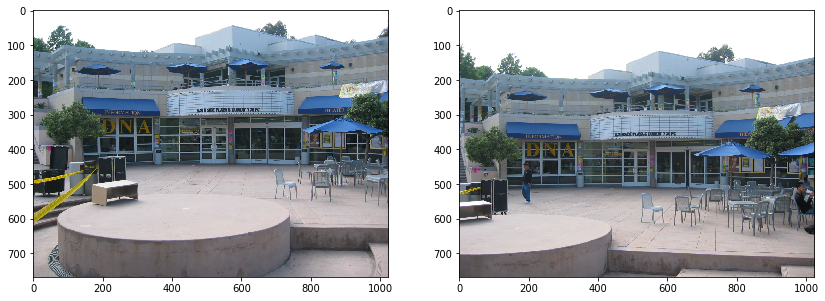

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# open the input images
I1 = np.array(Image.open('IMG_5030.JPG'), dtype='float')/255.
I2 = np.array(Image.open('IMG_5031.JPG'), dtype='float')/255.

# Display the input images
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(I1)
plt.subplot(1,2,2)
plt.imshow(I2)
plt.show()

## Problem 2 (Programing): Feature Detection (20 points)
For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
around 1350–1400 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

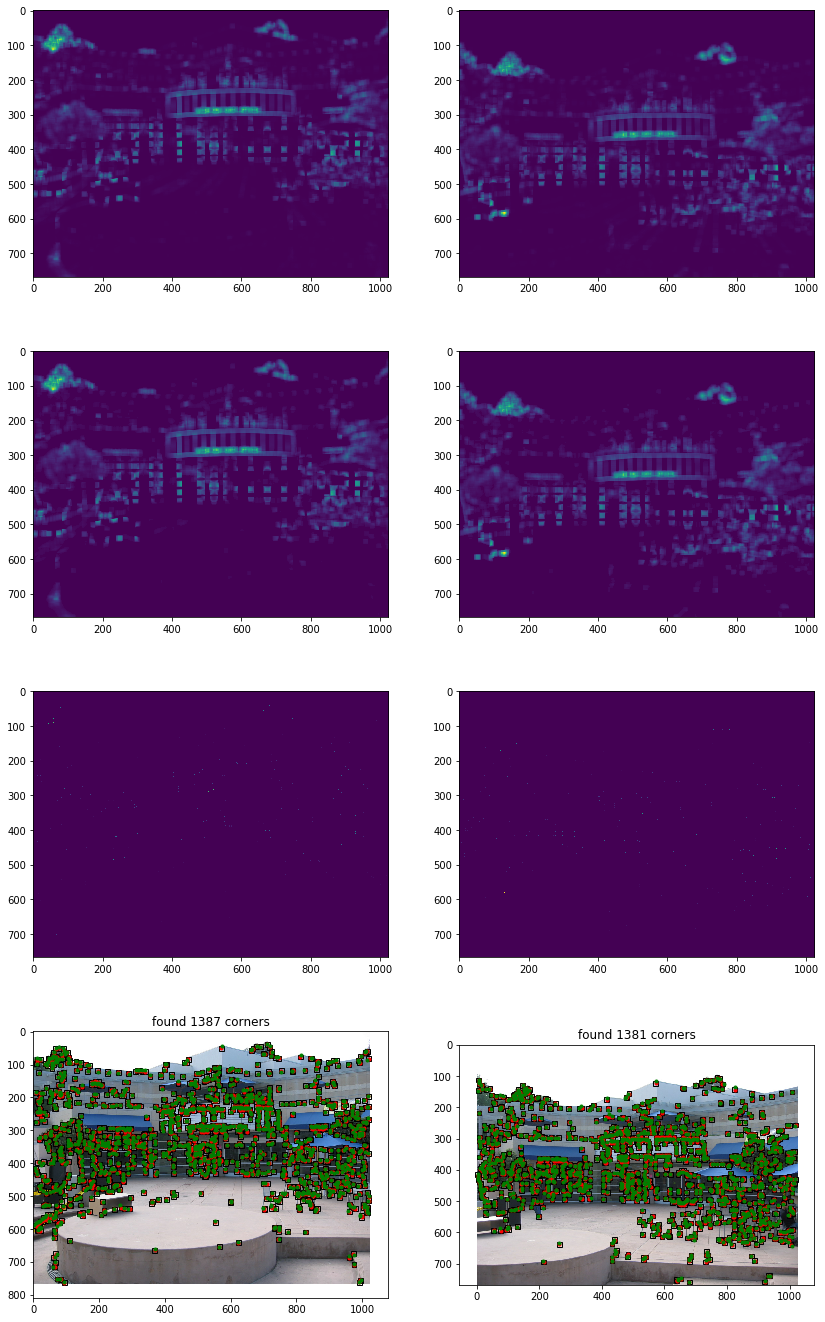

In [3]:
from scipy import signal
from scipy import ndimage

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def corner(I, w, t, w_nms):
    # inputs: 
    # I is the input image (may be mxn for BW or mxnx3 for RGB)
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the window used for nonmaximal supression
    # outputs:
    # J0 is the mxn image of minor eigenvalues of N before thresholding
    # J1 is the mxn image of minor eigenvalues of N after thresholding
    # J2 is the mxn image of minor eigenvalues of N after nonmaximal supression
    # pts0 is the 2xk list of coordinates of (pixel accurate) corners
    #     (ie. coordinates of nonzero values of J2)
    # pts1 is the 2xk list of coordinates of subpixel accurate corners
    #     found using the Forstner detector
    
    """your code here"""
    m,n = I.shape[:2]
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))
    J2 = np.zeros((m,n))
    Ix = np.zeros((m,n))
    Iy = np.zeros((m,n))
    
    I_gray = rgb2gray(I)
    gradient_kernel = 1.0/12*np.array([-1,8,0,-8,1])
    for i in range(m):
        Ix[i,:] = ndimage.convolve(I_gray[i,:],gradient_kernel, mode='reflect')
    for i in range(n):
        Iy[:,i] = np.transpose(ndimage.convolve(I_gray[:,i].T,gradient_kernel,mode='reflect'))
    
    Ixx = np.multiply(Ix,Ix)
    Ixy = np.multiply(Ix,Iy)
    Iyy = np.multiply(Iy,Iy)
    
    xIxx = np.zeros((m,n))
    yIyy = np.zeros((m,n))
    xIxy = np.zeros((m,n))
    yIxy = np.zeros((m,n))
    for i in range(m):
        xIxx[i,:] = i*Ixx[i,:]
        xIxy[i,:] = i*Ixy[i,:]
    for i in range(n):
        yIyy[:,i] = i*Iyy[:,i]
        yIxy[:,i] = i*Ixy[:,i]
        
    sum_kernel = np.ones((w,w))
    sum_w_Ixx = signal.convolve2d(Ixx,sum_kernel,'same','symm')
    sum_w_Ixy = signal.convolve2d(Ixy,sum_kernel,'same','symm')
    sum_w_Iyy = signal.convolve2d(Iyy,sum_kernel,'same','symm')
    sum_w_xIxx = signal.convolve2d(xIxx,sum_kernel,'same','symm')
    sum_w_xIxy = signal.convolve2d(xIxy,sum_kernel,'same','symm')
    sum_w_yIxy = signal.convolve2d(yIxy,sum_kernel,'same','symm')
    sum_w_yIyy = signal.convolve2d(yIyy,sum_kernel,'same','symm')
    
    det_N = sum_w_Ixx*sum_w_Iyy - sum_w_Ixy*sum_w_Ixy
    Tr_N = sum_w_Ixx+sum_w_Iyy
    for i in range(m):
        for j in range(n):
            if Tr_N[i,j]*Tr_N[i,j]-4*det_N[i,j]>=0:
                J0[i,j] = 1.0/2*(Tr_N[i,j]-np.sqrt(Tr_N[i,j]*Tr_N[i,j]-4*det_N[i,j]))
            else:
                J0[i,j] = 0
    for i in range(m):
        for j in range(n):
            if J0[i,j]<t: 
                J1[i,j] = 0
            else:
                J1[i,j] = J0[i,j]
    
    half_w_nms = int((w_nms-1)/2.0)
    for i in range(half_w_nms,m-half_w_nms):
        for j in range(half_w_nms,n-half_w_nms):
            window = J1[i-half_w_nms:i+half_w_nms,j-half_w_nms:j+half_w_nms]
            local_max = np.amax(window)
            if J1[i,j]==local_max:
                J2[i,j]=J1[i,j]
                
    pts0_x = []
    pts0_y = []
    pts1_x = []
    pts1_y = []
    for i in range(m):
        for j in range(n):
            if J2[i,j]!=0:
                pts0_x.append(j)
                pts0_y.append(i)
                A = np.array(([sum_w_Ixx[i,j],sum_w_Ixy[i,j]],
                             [sum_w_Ixy[i,j],sum_w_Iyy[i,j]]))
                b = np.array(([sum_w_xIxx[i,j]+sum_w_yIxy[i,j]],\
                              [sum_w_xIxy[i,j]+sum_w_yIyy[i,j]]))
                x = np.dot(np.linalg.inv(A),b)
                pts1_x.append(int(x[1]))
                pts1_y.append(int(x[0]))
                
    pts0 = np.array([pts0_x,pts0_y])
    pts1 = np.array([pts1_x,pts1_y])
    return J0, J1, J2, pts0, pts1


# parameters to tune
w=15
t=0.10
w_nms=7

# extract corners
J1_0, J1_1, J1_2, pts1_0, pts1_1 = corner(I1, w, t, w_nms)
J2_0, J2_1, J2_2, pts2_0, pts2_1 = corner(I2, w, t, w_nms)

# Display results
plt.figure(figsize=(14,24))

# show pre-thresholded corner heat map
plt.subplot(4,2,1)
plt.imshow(J1_0)
plt.subplot(4,2,2)
plt.imshow(J2_0)

# show thresholded corner heat map
plt.subplot(4,2,3)
plt.imshow(J1_1)
plt.subplot(4,2,4)
plt.imshow(J2_1)

# show corner heat map after nonmaximal supression
plt.subplot(4,2,5)
plt.imshow(J1_2)
plt.subplot(4,2,6)
plt.imshow(J2_2)

# show corners on origional images
ax = plt.subplot(4,2,7)
plt.imshow(I1)
# draw rectangles of size w around corners
for i in range(pts1_0.shape[1]):
    x,y = pts1_0[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
plt.plot(pts1_0[0,:], pts1_0[1,:], '.r') # display pixel accurate corners
plt.plot(pts1_1[0,:], pts1_1[1,:], '.g') # display subpixel corners
plt.title('found %d corners'%pts1_0.shape[1])
ax = plt.subplot(4,2,8)
plt.imshow(I2)
for i in range(pts2_0.shape[1]):
    x,y = pts2_0[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
plt.plot(pts2_0[0,:], pts2_0[1,:], '.r')
plt.plot(pts2_1[0,:], pts2_1[1,:], '.g')
plt.title('found %d corners'%pts2_0.shape[1])

plt.show()

## Problem 3 (Programing): Feature Matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that around 300 putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

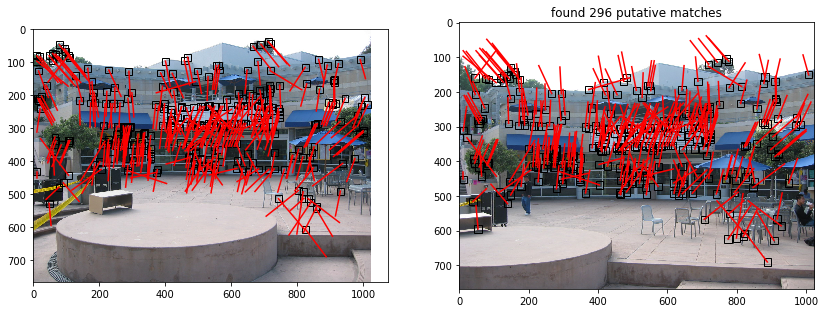

In [4]:
import math

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = np.array(a - mean2(a))
    b = np.array(b - mean2(b))

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

def match(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the proximity threshold
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    # scores is a vector of length k that contains the correlation
    #     coefficients of the matches
    
    """your code here"""
    I1_gray = rgb2gray(I1)
    I2_gray = rgb2gray(I2)
    m,n = I1.shape[:2]
    
    corr_m = np.zeros((pts1.shape[1],pts2.shape[1]))
    for i in range(pts1.shape[1]):
        for j in range(pts2.shape[1]):
            xmin1 = int(pts1[1,i]-(w-1)/2)
            ymin1 = int(pts1[0,i]-(w-1)/2)
            xmax1 = int(pts1[1,i]+(w-1)/2)
            ymax1 = int(pts1[0,i]+(w-1)/2)
            xmin2 = int(pts2[1,j]-(w-1)/2)
            ymin2 = int(pts2[0,j]-(w-1)/2)
            xmax2 = int(pts2[1,j]+(w-1)/2)
            ymax2 = int(pts2[0,j]+(w-1)/2)
            if xmin1<0 or ymin1<0 or xmin2<0 or ymin2<0: 
                corr_m[i,j] = -1
            elif xmax1>m or xmax2>m or ymax1>n or ymax2>n: 
                corr_m[i,j] = -1
            else:
                corr_m[i,j] = corr2(I1_gray[xmin1:xmax1,ymin1:ymax1],\
                                    I2_gray[xmin2:xmax2,ymin2:ymax2])
            
    mask = np.ones((pts1.shape[1],pts2.shape[1]))
    
    pair1 = []
    pair2 = []
    scores = []
    temp_corr_m = np.multiply(mask,corr_m)
    while t<np.max(temp_corr_m):
        max_index = np.argmax(temp_corr_m)
        max_corr = np.max(temp_corr_m)
        row = int(max_index/pts2.shape[1])
        col = int(max_index%pts2.shape[1])
        corr_m[row,col] = -1
        max_next = max([corr_m[row,:].max(),corr_m[:,col].max()])
        corr_m[row,col] = max_corr
        if (1-corr_m[row,col])<((1-max_next)*d):
            if math.sqrt(np.square(pts1[0,row]-pts2[0,col])+np.square(pts1[1,row]-pts2[1,col]))<p:
                pair1.append(row)
                pair2.append(col)
                scores.append(corr_m[row,col])
        mask[row,:] = np.zeros((1,pts2.shape[1]))
        mask[:,col] = np.zeros((1,pts1.shape[1]))
        temp_corr_m = np.multiply(mask,temp_corr_m)
    
    inds = np.array([pair1,pair2])
    scores = np.array(scores)
    
    return inds, scores

# parameters to tune
w1 = 21
t1 = 0.3
d1 = 1.0
p1 = 140

# do the matching
inds, scores = match(I1, I2, pts1_1, pts2_1, w1, t1, d1, p1)

# create new arays of points which are correspoinding
pts1 = pts1_1[:,inds[0,:]]
pts2 = pts2_1[:,inds[1,:]]

# display the results
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
plt.title('found %d putative matches'%inds.shape[1])
ax2.imshow(I2)
for i in range(inds.shape[1]):
    ii = inds[0,i]
    jj = inds[1,i]
    x1 = pts1_1[0,ii]
    x2 = pts2_1[0,jj]
    y1 = pts1_1[1,ii]
    y2 = pts2_1[1,jj]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w1/2,y1-w1/2),w1,w1, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w1/2,y2-w1/2),w1,w1, fill=False))
plt.show()
#print(scores)

## Problem 4 (Programing): Outlier Rejection (15 points)
  The resulting set of putative point correspondences should contain
  both inlier and outlier correspondences (i.e., false matches).
  Determine the set of inlier point correspondences using the
  M-estimator Sample Consensus (MSAC) algorithm, where the maximum
  number of attempts to find a consensus set is determined adaptively.
  For each trial, you must use the 7-point algorithm (as described in class) to estimate the
  fundamental matrix, resulting in 1 or 3 solutions.  Calculate the
  (squared) Sampson error as a first order approximation to the
  geometric error.

  hint: this problem has codimension 1.

In [5]:
from scipy.stats import chi2
import numpy as np
import time
import random
import sympy as sp

def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1]/x[-1]

In [6]:
def getNullSpace(A):
    u, s, vh = np.linalg.svd(A)
    ns_a = vh[-2,:]
    ns_b = vh[-1,:]
    ns = vh[-2:,:].T
    return ns_a, ns_b, ns

def getModel(selected_samples_pts1, selected_samples_pts2):
    pts1_homog = Homogenize(selected_samples_pts1)
    pts2_homog = Homogenize(selected_samples_pts2)
    
    A = np.zeros((7, 9))
    for i in range(7):
        pt1 = pts1_homog[:, i][None, :]
        pt2 = pts2_homog[:, i][None, :]
        A[i, :] = np.kron(pt2, pt1)
        
    ns_a, ns_b, ns = getNullSpace(A)
    F1 = ns_a.reshape(3,3)
    F2 = ns_b.reshape(3,3)
        
    alpha = sp.symbols('alpha')
    F = alpha * sp.Matrix(F1) + sp.Matrix(F2)
    equation = F.det()
    alpha_lst = sp.solve(equation, alpha)
    
    F_lst = []
    for alpha_t in alpha_lst:
        if abs(sp.im(alpha_t)) < 1.e-10:
            alpha_t = sp.re(alpha_t)
            F = float(alpha_t) * F1 + F2
            F_lst.append(F)
    return F_lst

#     G = ns[0,0]*ns[4,0]*ns[8,0] \
#     - ns[0,0]*ns[5,0]*ns[7,0] \
#     - ns[1,0]*ns[3,0]*ns[8,0] \
#     + ns[1,0]*ns[5,0]*ns[6,0] \
#     + ns[2,0]*ns[3,0]*ns[7,0] \
#     - ns[2,0]*ns[4,0]*ns[6,0]
#     H = ns[0,0]*ns[4,0]*ns[8,1] \
#     - ns[0,0]*ns[5,0]*ns[7,1] \
#     - ns[0,0]*ns[7,0]*ns[5,1] \
#     + ns[0,0]*ns[8,0]*ns[4,1] \
#     - ns[1,0]*ns[3,0]*ns[8,1] \
#     + ns[1,0]*ns[5,0]*ns[6,1] \
#     + ns[1,0]*ns[6,0]*ns[5,1] \
#     - ns[1,0]*ns[8,0]*ns[3,1] \
#     + ns[2,0]*ns[3,0]*ns[7,1] \
#     - ns[2,0]*ns[4,0]*ns[6,1] \
#     - ns[2,0]*ns[6,0]*ns[4,1] \
#     + ns[2,0]*ns[7,0]*ns[3,1] \
#     + ns[3,0]*ns[7,0]*ns[2,1] \
#     - ns[3,0]*ns[8,0]*ns[1,1] \
#     - ns[4,0]*ns[6,0]*ns[2,1] \
#     + ns[4,0]*ns[8,0]*ns[0,1] \
#     + ns[5,0]*ns[6,0]*ns[1,1] \
#     - ns[5,0]*ns[7,0]*ns[0,1]
#     I = ns[0,0]*ns[4,1]*ns[8,1] \
#     - ns[0,0]*ns[5,1]*ns[7,1] \
#     - ns[1,0]*ns[3,1]*ns[8,1] \
#     + ns[1,0]*ns[5,1]*ns[6,1] \
#     + ns[2,0]*ns[3,1]*ns[7,1] \
#     - ns[2,0]*ns[4,1]*ns[6,1] \
#     - ns[3,0]*ns[1,1]*ns[8,1] \
#     + ns[3,0]*ns[2,1]*ns[7,1] \
#     + ns[4,0]*ns[0,1]*ns[8,1] \
#     - ns[4,0]*ns[2,1]*ns[6,1] \
#     - ns[5,0]*ns[0,1]*ns[7,1] \
#     + ns[5,0]*ns[1,1]*ns[6,1] \
#     + ns[6,0]*ns[1,1]*ns[5,1] \
#     - ns[6,0]*ns[2,1]*ns[4,1] \
#     - ns[7,0]*ns[0,1]*ns[5,1] \
#     + ns[7,0]*ns[2,1]*ns[3,1] \
#     + ns[8,0]*ns[0,1]*ns[4,1] \
#     - ns[8,0]*ns[1,1]*ns[3,1]
#     J = ns[0,1]*ns[4,1]*ns[8,1] \
#     - ns[0,1]*ns[5,1]*ns[7,1] \
#     - ns[1,1]*ns[3,1]*ns[8,1] \
#     + ns[1,1]*ns[5,1]*ns[6,1] \
#     + ns[2,1]*ns[3,1]*ns[7,1] \
#     - ns[2,1]*ns[4,1]*ns[6,1]
#     alpha = np.roots(np.array([G,H,I,J]).reshape(4))
#     alpha = np.real(alpha[np.isreal(alpha)])
    
#     F_lst = []
#     for alpha_t in alpha:
#         F_lst.append(alpha_t*F1+F2)
#     return F_lst
    
    
def getSampsonError(pts1, pts2, F):
    num_pts = pts1.shape[1]
    Sampson_vects = np.zeros((4, num_pts))
    error_vects = []
    
    pts1_homog = Homogenize(pts1)
    pts2_homog = Homogenize(pts2)
    for i in range(num_pts):
        x1 = pts1[0,i]
        y1 = pts1[1,i]
        x2 = pts2[0,i]
        y2 = pts2[1,i]
        pt1_homog = pts1_homog[:, i] [None, :]
        pt2_homog = pts2_homog[:, i] [None, :]
        
        A_i = np.kron(pt2_homog, pt1_homog)
        f = F.reshape(-1, 1)
        epsil = A_i.dot(f)
        J = np.array([x2*F[0,0]+y2*F[1,0]+F[2,0],\
                      x2*F[0,1]+y2*F[1,1]+F[2,1],\
                      x1*F[0,0]+y1*F[0,1]+F[0,2],\
                      x1*F[1,0]+y1*F[1,1]+F[1,2]]) [None, :]
        
        lambda_s = -1.0*epsil/(J.dot(J.T))
        delta = J.T*lambda_s
        Sampson_vects[:, i] = delta.ravel()
        error = delta.T.dot(delta)
        error_vects.append(error)
    return error_vects, Sampson_vects



def getConsensusCost(err_vect, tol):
    count = len(err_vect)
    cost = 0 
    inlier_idxs =  []
    for i in range(count):
        if err_vect[i] <= tol:
            cost = cost + err_vect[i]
            inlier_idxs.append(i)  
        else:
            cost = cost + tol
    return cost, inlier_idxs

In [7]:
def MSAC(pts1, pts2, thresh, tol, p):
    # Inputs:
    #    pts1 - matched feature correspondences in image 1 inhomog
    #    pts2 - matched feature correspondences in image 2 inhomog
    #    thresh - cost threshold
    #    tol - reprojection error tolerance 
    #    p - probability that as least one of the random samples does not contain any outliers   
    #
    # Output:
    #    consensus_min_cost - final cost from MSAC
    #    consensus_min_cost_model - fundamental matrix F
    #    inliers - list of indices of the inliers corresponding to input data
    #    trials - number of attempts taken to find consensus set
    
    """your code here"""
    trials = 0
    max_trials = np.inf
    consensus_min_cost = np.inf
    consensus_min_cost_model = np.zeros((3,3))
    
    
    num_pts = pts1.shape[1]
    s = 7
    while (trials < max_trials and consensus_min_cost > thresh) :
        # select random samples, in this case 7
        selected_sample_idxs = random.sample(range(num_pts), s)
        selected_samples_pts1 = pts1[:, selected_sample_idxs]
        selected_samples_pts2 = pts2[:, selected_sample_idxs]
        model_lst = getModel(selected_samples_pts1, selected_samples_pts2)
#         break
        for F in model_lst:
            # calculate error for eaych data point, under each model, which is Sampson error
            error_vect, _ = getSampsonError(pts1, pts2, F)
            # calculate consensus cost
            consensus_cost, inlier_idxs = getConsensusCost(error_vect, tol)
            if consensus_cost < consensus_min_cost:
                consensus_min_cost = consensus_cost
                consensus_min_cost_model = F
                inliers = inlier_idxs
                w = len(inlier_idxs) / num_pts
                if w > 0:
                    pass
                max_trials = np.log(1-p)/np.log(1-w**s)
        trials = trials + 1
    return consensus_min_cost, consensus_min_cost_model, inliers, trials

took 17.170966 secs
44 iterations
inlier count:  242
inliers:  [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 131, 132, 133, 135, 136, 138, 139, 140, 141, 142, 143, 144, 146, 147, 149, 150, 151, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 190, 191, 192, 194, 195, 198, 199, 200, 202, 203, 206, 208, 209, 210, 212, 213, 215, 216, 217, 219, 220, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 236, 237, 239, 240, 241, 242, 243, 245, 246, 247, 249, 250, 

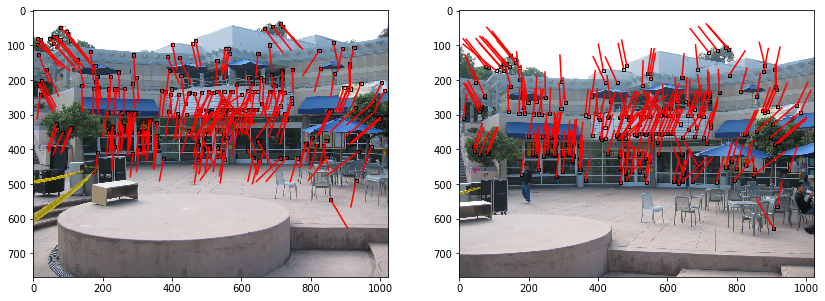

In [59]:
# MSAC parameters 
thresh = 200
p = 0.99
alpha = 0.95
freedom = 1
tol = chi2.ppf(alpha, freedom) * 1 # inverse chi squared cumulative distribution function * (sigma^2 = 1)

tic=time.time()
cost_MSAC, F_MSAC, inliers, trials = MSAC(pts1, pts2, thresh, tol, p)


# choose just the inliers
x1 = pts1[:,inliers]
x2 = pts2[:,inliers]
outliers = np.setdiff1d(np.arange(pts1.shape[1]),inliers)

toc=time.time()
time_total=toc-tic

# display the results
print('took %f secs'%time_total)
print('%d iterations'%trials)
print('inlier count: ',len(inliers))
print('inliers: ',inliers)
print('MSAC Cost = %.9f'%cost_MSAC)
print('F_MSAC = ')
print(F_MSAC)

# display the figures
"""your code here"""
w1 = 9
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
for i in range(len(inliers)):
    x1_x, x1_y = x1[:, i]
    x2_x, x2_y = x2[:, i]

    ax1.plot([x1_x, x2_x],[x1_y, x2_y],'-r')
    ax1.add_patch(patches.Rectangle((x1_x-w1/2,x1_y-w1/2),w1,w1, fill=False))
    ax2.plot([x2_x, x1_x],[x2_y, x1_y],'-r')
    ax2.add_patch(patches.Rectangle((x2_x-w1/2,x2_y-w1/2),w1,w1, fill=False))
plt.show()

## Problem 5 (Programing): Linear Estimate (15 points)
  Estimate the fundamental matrix $\boldsymbol{F}_\text{DLT}$ from the
  resulting set of inlier correspondences using the direct linear
  transformation (DLT) algorithm (with data normalization).  Include
  the numerical values of the resulting $\boldsymbol{F}_\text{DLT}$, scaled
  such that $||\boldsymbol{F}_\text{DLT}||_\text{Fro} = 1$

In [60]:
def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates    
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates   
    return x[:-1]/x[-1]

def Normalize(pts):
    # data normalization of n dimensional pts
    #
    # Input:
    #    pts - is in inhomogeneous coordinates
    # Outputs:
    #    pts - data normalized points
    #    T - corresponding transformation matrix
    """your code here"""
    num = pts.shape[0] # 3 or 2
    var_sum = np.sum(np.var(pts, axis=1)) # sum(varx, vary, varz) or sum(varx, vary)
    mean = np.mean(pts, axis=1) # ux, uy, uz or ux, uy
    s = np.sqrt(num/var_sum)
    
    T = np.eye(pts.shape[0]+1)
    
    diag_s = np.eye(pts.shape[0]) * s
    T[0:num, 0:num] = diag_s
    T[0:-1, -1] = -mean * s
    
    pts_homog = Homogenize(pts) # make pts from inhomog to homog
    pts = Dehomogenize(T.dot(pts_homog)) # normalized inhomog pts
    return pts, T

In [61]:
def DLT(x1, x2, normalize=True):
    # Inputs:
    #    x1 - inhomogeneous inlier correspondences in image 1
    #    x2 - inhomogeneous inlier correspondences in image 2
    #    normalize - if True, apply data normalization to x1 and x2
    #
    # Outputs:
    #    F - the DLT estimate of the fundamental matrix  
    
    """your code here"""
    
    num_pts = x1.shape[1]
    # data normalization
    if normalize:
        print('normalize')
        x1_nmd, T1 = Normalize(x1) # inhomog
        x2_nmd, T2 = Normalize(x2)
        cov_x1i = np.eye(2) * (T1[0,0]**2)
        cov_x2i = np.eye(2) * (T2[0,0]**2)

    # data denormalize
    else:
        print('denormalize')
        x1_nmd = x1
        x2_nmd = x2
        cov_x1i = np.eye(2)
        cov_x2i = np.eye(2)
        
    x1_nmd_homog = Homogenize(x1_nmd) # nmd means normalized
    x2_nmd_homog = Homogenize(x2_nmd)
    
    A = np.zeros((num_pts, x2_nmd_homog.shape[0] * x1_nmd_homog.shape[0])) # (232) * 9
    for i in range(num_pts):
        A[i : i + 1, :] = np.kron(x2_nmd_homog[:, i], x1_nmd_homog[:, i])
    
    _,S,VH = np.linalg.svd(A)    
    f_vector = VH[-1, :]
    F = f_vector.reshape(3,3)
    
    U_F,S_F,VH_F = np.linalg.svd(F)  
    S_F[2] = 0
    F = U_F @ np.diag(S_F) @ VH_F
    
    if normalize:
        print('denormalizing F')
        F = T2.T @ F @ T1 # origin pixel frame
    F = F / np.linalg.norm(F)
    return F


# compute the linear estimate with data normalization
print ('DLT with Data Normalization')
time_start=time.time()
F_DLT = DLT(x1, x2, normalize=True)
time_total=time.time()-time_start

# display the resulting F_DLT, scaled with its frobenius norm
print('F_DLT =')
print(F_DLT)

DLT with Data Normalization
normalize
denormalizing F
F_DLT =
[[-4.78146377e-09 -3.65574874e-06  1.16677189e-03]
 [ 2.53980371e-06 -7.08201124e-07  1.03968499e-02]
 [-9.95790136e-04 -9.20587318e-03 -9.99902397e-01]]


## Problem 6 (Programing): Nonlinear Estimate (55 points) 
  Retrieve the camera projection matrices $\boldsymbol{P} = [\boldsymbol{I} \,|\,
  \boldsymbol{0}]$ and $\boldsymbol{P}' = [\boldsymbol{M} \,|\, \boldsymbol{v}]$, where $\boldsymbol{M}$
  is full rank, from $\boldsymbol{F}_\text{DLT}$.  Use the resulting camera
  projection matrix $\boldsymbol{P}'$ associated with the second image and
  the triangulated 3D points as an initial estimate to an iterative
  estimation method, specifically the sparse Levenberg-Marquardt
  algorithm, to determine the Maximum Likelihood estimate of the
  fundamental matrix $\boldsymbol{F} = [\boldsymbol{v}]_\times \boldsymbol{M}$ that
  minimizes the reprojection error.  The initial estimate of the 3D
  points must be determined using the two-view optimal triangulation
  method described in lecture (algorithm 12.1 in the Hartley \&
  Zisserman book, but use the ray-plane intersection method for the
  final step instead of the homogeneous method).  Additionally, you
  must parameterize the camera projection matrix $\boldsymbol{P}'$ associated
  with the second image and the homogeneous 3D scene points that are
  being adjusted using the parameterization of homogeneous vectors
  (see section A6.9.2 (page 624) of the textbook, and the corrections
  and errata).

  Show the initial cost (i.e., the cost at iteration 0) and the cost at the end of each successive iteration. 
  Make sure to display with sufficient precision that we can see the error decrease (at least during the first step).

In [62]:
# np.save('x1', x1)
# np.save('x2', x2)
# np.save('F', F_DLT)

In [63]:
x1 = np.load('x1.npy')
x2 = np.load('x2.npy')
F_DLT = np.load('F.npy')

In [64]:
import sympy as sp
import numpy as np
def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates    
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates   
    return x[:-1]/x[-1]

def Normalize(pts):
    # data normalization of n dimensional pts
    #
    # Input:
    #    pts - is in inhomogeneous coordinates
    # Outputs:
    #    pts - data normalized points
    #    T - corresponding transformation matrix
    """your code here"""
    num = pts.shape[0] # 3 or 2
    var_sum = np.sum(np.var(pts, axis=1)) # sum(varx, vary, varz) or sum(varx, vary)
    mean = np.mean(pts, axis=1) # ux, uy, uz or ux, uy
    s = np.sqrt(num/var_sum)
    
    T = np.eye(pts.shape[0]+1)
    
    diag_s = np.eye(pts.shape[0]) * s
    T[0:num, 0:num] = diag_s
    T[0:-1, -1] = -mean * s
    
    pts_homog = Homogenize(pts) # make pts from inhomog to homog
    pts = Dehomogenize(T.dot(pts_homog)) # normalized inhomog pts
    return pts, T


In [65]:
def getF2P1P2(F):
    """Decompose F to P1 and P2 from F"""
    P1 = np.array([[1, 0, 0, 0], 
                   [0, 1, 0, 0],
                   [0, 0, 1, 0]])
    
    U,D,VH = np.linalg.svd(F)
    W = np.array([[0, 1, 0],
                  [-1, 0, 0],
                  [0, 0, 0]])
    
    Z = np.array([[0, -1, 0],
                  [1, 0, 0],
                  [0, 0, 1]])
    D_prime = np.diag([D[0], D[1], (D[0] + D[1])/2])
    S = U @ W @ U.T
    M = U @ Z @ D_prime @ VH
    e_prime = np.array([S[2, 1], S[0, 2], S[1, 0]])[:, None]
    P2 = np.hstack((M, e_prime))
    return P1, P2



def getEpipoles(Fs):
    U, D, VH = np.linalg.svd(Fs, full_matrices=False)
    e1 = VH[-1,:]
    
    U, D, VH = np.linalg.svd(Fs.T, full_matrices=False)
    e2 = VH[-1,:]
    
    e1 = 1.0/np.sqrt(e1[0]**2+e1[1]**2)*e1
    e2 = 1.0/np.sqrt(e2[0]**2+e2[1]**2)*e2
    return e1[:, None], e2[:, None]
    
def getRotations(e1, e2):
    e1 = e1.ravel()
    e2 = e2.ravel()
    
    R1 = np.array([[e1[0], e1[1], 0],
                   [-e1[1], e1[0], 0],
                   [0, 0, 1]])
    
    R2 = np.array([[e2[0], e2[1], 0],
                   [-e2[1], e2[0], 0],
                   [0, 0, 1]])
    return R1, R2

def get_t(a,b,c,d,f1,f2):
    """polynomial solver, and get best t"""
    # solve for t
#     t = sp.symbols('t')
#     G = t * ((a*t + b)**2 + f2**2 * (c*t + d)**2)**2\
#     -(a*d - b*c) * (1 + f1**2 * t**2)**2 * (a*t + b) * (c*t + d)
#     root_lst = sp.solve(G, t)
#     reals_lst = [float(sp.re(x)) for x in root_lst]
    f = f1
    f_prime = f2
    G = -a*c*np.power(f,4)*(a*d - b*c)
    H = (a**2 + c**2*f_prime**2)**2 - a*d*np.power(f,4)*(a*d - b*c) - b*c*np.power(f,4)*(a*d - b*c)
    I = 2*(a**2 + c**2*f_prime**2)*(2*c*d*f_prime**2 + 2*a*b) - 2*a*c*f**2*(a*d - b*c) - b*d*np.power(f,4)*(a*d - b*c)
    J = 2*(a**2 + c**2*f_prime**2)*(b**2 + d**2*f_prime**2) + (2*c*d*f_prime**2 + 2*a*b)**2 - 2*a*d*f**2*(a*d - b*c) - 2*b*c*f**2*(a*d - b*c)
    K = 2*(b**2 + d**2*f_prime**2)*(2*c*d*f_prime**2 + 2*a*b) - a*c*(a*d - b*c) - 2*b*d*f**2*(a*d - b*c)
    L = (b**2 + d**2*f_prime**2)**2 - a*d*(a*d - b*c) - b*c*(a*d - b*c)
    M = - b*d*(a*d - b*c)
    root_lst = np.roots(np.array([G,H,I,J,K,L,M]).reshape(7))
    reals_lst = (np.real(root_lst)).tolist()
    
    # select t
    best_t = 0
    best_cost = np.inf
    for t in reals_lst:
        cost = t**2/(1.0+f1**2*t**2)+(c*t+d)**2/((a*t+b)**2+f2**2*(c*t+d)**2)
        if cost<best_cost:
            best_cost = cost
            best_t = t
            
    cost = 1.0/(f1**2)+c**2/(a**2+f2**2*c**2)
    if cost<best_cost:
        best_cost = cost
        best_t = np.inf
    return best_t



def getClosestPointOnLine(l):
    a = l[0]
    b = l[1]
    c = l[2]
    x = np.array([-a*c, -b*c, a**2+b**2]) [:, None]
    return x

    

def getCorrectedPoints(pts1, pts2, F):
    """get corrected pts in both images plane
    pts1 and pts2 are both inhomog
    """
    num_pts = pts1.shape[1]
    
    
    pts1 = Homogenize(pts1)
    pts2 = Homogenize(pts2)
    
    pts1_corrected_homog = np.zeros_like(pts1) # homog
    pts2_corrected_homog = np.zeros_like(pts2)
    
    for i in range(num_pts):
        pt1 = pts1[:, i]
        pt2 = pts2[:, i]
        # mapping pt1 and pt2 into origin of both images
        T1 = np.array([[pt1[2], 0, -pt1[0]],
                       [0, pt1[2], -pt1[1]],
                       [0, 0, pt1[2]]])
        
        T2 = np.array([[pt2[2], 0, -pt2[0]],
                       [0, pt2[2], -pt2[1]],
                       [0, 0, pt2[2]]])
        Fs = np.linalg.inv(T2).T @ F @ np.linalg.inv(T1)

        
        # get rotation matrix
        e1, e2 = getEpipoles(Fs)
        R1, R2 = getRotations(e1, e2)
        Fs = R2 @ Fs @ R1.T
        
        # get best t
        f1 = e1[2,0]
        f2 = e2[2,0]
        a = Fs[1,1]
        b = Fs[1,2]
        c = Fs[2,1]
        d = Fs[2,2]
        t = get_t(a,b,c,d,f1,f2)
        
        
        # get line1 and line2 
        if t == np.inf:
            l1 = np.array([f1,0,-1])
            l2 = np.array([-f2*c,a,c])
        else:
            l1 = np.array([t*f1,1,-t])
            l2 = np.array([-f2*(c*t+d), a*t+b,c*t+d])
            
        x1 = getClosestPointOnLine(l1)
        pts1_corrected_homog[:, i] = (np.linalg.inv(T1) @ (R1.T) @ (x1)).ravel() #homog mapping back to origin scale
        
        x2 = getClosestPointOnLine(l2)
        pts2_corrected_homog[:, i] = (np.linalg.inv(T2) @ (R2.T) @ (x2)).ravel()
   
    return pts1_corrected_homog, pts2_corrected_homog
        
    
    

def get3DReconstruction(pts1_homog, pts2_homog, F):
    """pts1_homog and pts2_homog are corrected points"""
    num_pts = pts1_homog.shape[1]
    P1, P2 = getF2P1P2(F)
    P_pseudoinv = P1.T
    C = np.array([0,0,0,1])
    pts_3D_homog = np.zeros((4, num_pts))
    for i in range(num_pts):
        pt1 = pts1_homog[:, i]
        pt2 = pts2_homog[:, i]
        
        #tirangulation
        l2 = (F @ (pt1.reshape(-1,1))).ravel() # the corrected pt1 map to image2 is line 2
        l2_orthog = np.array([-l2[1]*pt2[2], l2[0]*pt2[2], l2[1]*pt2[0]-l2[0]*pt2[1]])
        
        plane_pi = (P2.T @ l2_orthog.reshape(-1,1)).ravel() # (a,b,c,d)
        X = (P_pseudoinv @ pt1.reshape(-1,1)).ravel()

        
        X_pi = np.array([plane_pi[3]*X[0], 
                         plane_pi[3]*X[1], 
                         plane_pi[3]*X[2],\
                        -(plane_pi[0]*X[0]+plane_pi[1]*X[1]+plane_pi[2]*X[2])])
        pts_3D_homog[:, i] = X_pi
        
    pts_3D = Dehomogenize(pts_3D_homog)
    return pts_3D # reconstructed 3D points inhomog
    

In [66]:
def Sinc(x):
    # Returns a scalar valued sinc value
    """your code here"""
    if x == 0:
        y = 1
    else:
        y = np.sin(x) / x
    return y

def d_Sinc(x):
    if x == 0:
        return 0
    else:
        return np.cos(x)/x-np.sin(x)/(x**2)

def Parameterize(P):
    # wrapper function to interface with LM
    # takes all optimization variables and parameterizes all of them
    # in this case it is just P, but in future assignments it will
    # be more useful   
    return ParameterizeHomog(P.reshape(-1,1))


def Deparameterize(p):
    # Deparameterize all optimization variables
    return DeParameterizeHomog(p) # need to be reshape 3,4 or keep 



def ParameterizeHomog(V):
    # Given a homogeneous vector V return its minimal parameterization
    """your code here"""
    num = V.shape[0]
    
    V_normed = V / np.linalg.norm(V)
    a = V_normed[0, 0]
    b = V_normed[1:, 0]
    
    v = 2.0/Sinc(np.arccos(a)) * b # (11,)
    
    v_norm = np.linalg.norm(v)
    if v_norm > np.pi: 
        v = (1 - 2*np.pi/v_norm * np.ceil((v_norm - np.pi)/(2*np.pi))) * v 
        if v_norm == 2 * np.pi:
            v = np.zeros(num - 1)
            v[0] = -1
    return v[:, None]


def DeParameterizeHomog(v):
    # Given a parameterized homogeneous vector return its deparameterization
    """your code here"""
    num = v.shape[0]
    v_norm = np.linalg.norm(v)
    if v_norm > np.pi: 
        v = (1 - 2.0*np.pi/v_norm * np.ceil((v_norm - np.pi)/(2.0*np.pi))) * v 
        if v_norm == 2 * np.pi:
            v = np.zeros(num)
            v[0] = -1
        
    a = np.cos(v_norm / 2)
    b = Sinc(v_norm/2) / 2 * v # vector
    
    a = np.array([a])[:, None]
    V = np.vstack((a, b)) # (12, 1)
    
    V = V / np.linalg.norm(V)
    return V

In [67]:
def tail(p):
    """
    d_Xhomog/d_xparam

    p is homog_paramed
    """
    n = p.shape[0]
    
    p_norm = np.linalg.norm(p)
    b = (Sinc(p_norm/2.0)/2.0*p).ravel()
    if p_norm == 0:
        da_dp = np.zeros((1, n))
        db_dp = 0.5 * np.eye(n)
    else:
        da_dp = - 0.5 * b[None, :]
        db_dp = 0.5 * Sinc(0.5 * p_norm) * np.eye(n) + 0.25/p_norm * d_Sinc(0.5 * p_norm) * p.dot(p.T)
    return np.vstack((da_dp, db_dp))


    
def Jacobian(xs, xs_prm, P1, P2, p2):
    """
    xs inhomog 3d pts 3*N
    xs_prm parameterized from xs_homog, 3* N
    p is parameterized P, which is for image 2
    """
    num_pts = xs.shape[1]
  
    
    xs_homog = Homogenize(xs)
    x1_p = Dehomogenize(P1 @ xs_homog)
    x2_p = Dehomogenize(P2 @ xs_homog)
    
#     H1 = np.eye(3) # map from scene to image1
    
    A2_lst = []
    B1_lst = []
    B2_lst = []
    for i in range(num_pts) :
        
        x = xs_homog[:, i] # scene 3D
        
        x_ = xs_prm[:, i]
        # A2_i, d(x2_p)/ d(h) 2 * 8
        x2_ = x2_p[:, i]
        wi_A2 = sum(P2[-1, :] * x)
        A2_i = np.array([[x[0], x[1], x[2], x[3], 0, 0, 0, 0, -x2_[0]*x[0], -x2_[0]*x[1], -x2_[0]*x[2], -x2_[0]*x[3] ],
                         [0, 0, 0, 0, x[0], x[1], x[2], x[3], -x2_[1]*x[0], -x2_[1]*x[1], -x2_[1]*x[2], -x2_[1]*x[3] ]]) @ tail(p2) / wi_A2
        A2_lst.append(A2_i)
        
        # B2_i
        wi_B2 = sum(P2[-1, :] * x)
        B2_i = np.array([P2[0, :] - x2_[0] * P2[2, :],
                         P2[1, :] - x2_[1] * P2[2, :]]) @ tail(x_[:, None]) / wi_B2
        B2_lst.append(B2_i)
        
        # B1_i
        x1_ = x1_p[:, i]
        wi_B1 = sum(P1[-1, :] * x)
        B1_i = np.array([P1[0, :] - x1_[0] * P1[2, :],
                         P1[1, :] - x1_[1] * P1[2, :]]) @ tail(x_[:, None]) / wi_B1
        B1_lst.append(B1_i) 
    return A2_lst, B1_lst, B2_lst


In [74]:
from scipy.linalg import block_diag

def skew(w):
    # Returns the skew-symmetrix represenation of a vector
    """your code here"""
    w = w.ravel()
    w_skew=np.array([[0, -w[2], w[1]],
                     [w[2], 0, -w[0]], 
                     [-w[1], w[0], 0]])
    return w_skew

def getP2F(P2):
    M = P2[:,:-1]
    e2 = P2[:, -1]
    
    F = skew(e2) @ M
    return F
    

def LM(F, x1, x2, max_iters, lam, normalize = True):
    # Input:
    #    F - DLT estimate of the fundamental matrix
    #    x1 - inhomogeneous inlier points in image 1
    #    x2 - inhomogeneous inlier points in image 2
    #    max_iters - maximum number of iterations
    #    lam - lambda parameter
    # Output:
    #    F - Final fundamental matrix obtained after convergenc
    
    """your code here"""
    # Preparing Data
    num_pts = x1.shape[1]
    
    pts1_homog, pts2_homog = getCorrectedPoints(x1, x2, F) 
    pts_3D = get3DReconstruction(pts1_homog, pts2_homog, F) # inhomog
    P1, P2 = getF2P1P2(F)
    
    
    #x1, x2, and pts_3D does not be transformed
    # data normalization
    if normalize:
        print('normalize')
        x1_nmd, T1 = Normalize(x1) # inhomog
        x2_nmd, T2 = Normalize(x2)
        X3D_nmd, T3 = Normalize(pts_3D)
        
        cov_x1i = np.eye(2) * (T1[0,0]**2)
        cov_x2i = np.eye(2) * (T2[0,0]**2)

        P1 = T1 @ P1 @ np.linalg.inv(T3)
        P2 = T2 @ P2 @ np.linalg.inv(T3)
        
    # data denormalize
    else:
        print('not normalize')
        x1_nmd = x1
        x2_nmd = x2
        X3D_nmd = pts_3D #inhomog 3xN
        
        cov_x1i = np.eye(2)
        cov_x2i = np.eye(2)
        #P1 and P2 do not change
    
    
    # step 1 of LM
    x1_nmd_p = Dehomogenize(P1 @ Homogenize(X3D_nmd))
    x2_nmd_p = Dehomogenize(P2 @ Homogenize(X3D_nmd))

    e1 = x1_nmd - x1_nmd_p  
    e2 = x2_nmd - x2_nmd_p
    cost_pre = 0
    for i in range(num_pts):
        cost_pre += e2[:, i] [None, :] @ np.linalg.inv(cov_x2i) @ e2[:, i] [:, None] + \
                    e1[:, i] [None, :] @ np.linalg.inv(cov_x1i) @ e1[:, i] [:, None]
    print ('iter %03d Cost %.9f'%(0, cost_pre))
    
    # Do LM following, need change something
    X3D_nmd_params = np.zeros_like(X3D_nmd) # homog 4xN to parameterized 3xN
    X3D_nmd_homog = Homogenize(X3D_nmd)
    for i in range(num_pts):
        X3D_nmd_params[:, i] = Parameterize(X3D_nmd_homog[:, i]).ravel()
        
    
    for j in range(max_iters): 
#         break
        # step 2: calculate Jacobian matrix 
        p2 = Parameterize(P2)
        P2 = Deparameterize(p2).reshape(3,4)
        A2_lst, B1_lst, B2_lst = Jacobian(X3D_nmd, X3D_nmd_params, P1, P2, p2)
        
        # step 3: calculate normal equation
        U2 = 0
        e_a = 0
        e_b_lst = []
        
        v1_lst = []
        w2_lst = []
        for i in range(num_pts):
            A2_i = A2_lst[i]
            B1_i = B1_lst[i]
            B2_i = B2_lst[i]
            
            e1_i = e1[:, i] [:, None]
            e2_i = e2[:, i] [:, None]
            ##calculate normal equation matrix 
            U2 += A2_i.T @ np.linalg.inv(cov_x2i) @ A2_i
            
            v1_i = B1_i.T @ np.linalg.inv(cov_x1i) @ B1_i + \
                   B2_i.T @ np.linalg.inv(cov_x2i) @ B2_i
            v1_lst.append(v1_i)
            
            w2_i = A2_i.T @ np.linalg.inv(cov_x2i) @ B2_i
            w2_lst.append(w2_i)
        
            ##calculate mormal equation vector
            e_a += A2_i.T @ np.linalg.inv(cov_x2i) @ e2_i
            
            e_b_i = B1_i.T @ np.linalg.inv(cov_x1i) @ e1_i + \
                    B2_i.T @ np.linalg.inv(cov_x2i) @ e2_i
            e_b_lst.append(e_b_i)

        iter_num = 0
        while True:
        
            if iter_num>20:
                break
            # step 4: calculate Augmented normal equation, and solve for delta
            S = 0
            E = 0
            for i in range(num_pts):
                v1_i = v1_lst[i]
                w2_i = w2_lst[i]
                v1_i_aug = v1_i + lam * np.eye(v1_i.shape[1])
                S += w2_i @ np.linalg.inv(v1_i_aug) @ w2_i.T
                e_b_i = e_b_lst[i]
                E += w2_i @ np.linalg.inv(v1_i_aug) @ e_b_i
            S2 = U2 + lam * np.eye(U2.shape[1]) - S
            E2 = e_a - E
            delta_a = np.linalg.inv(S2) @ E2 # solve for delta a

            # now solve for delta b
            delta_b = np.zeros_like(X3D_nmd_params) # array 2 * N
            for i in range(num_pts):
                v1_i = v1_lst[i]
                w2_i = w2_lst[i]
                e_b_i = e_b_lst[i]
                v1_i_aug = v1_i + lam * np.eye(v1_i.shape[1])
                delta_b_i = np.linalg.inv(v1_i_aug) @ (e_b_i - w2_i.T @  delta_a)
                delta_b[:, i] = delta_b_i.ravel()

            # step 5: update parameters using delta_a and delta_b
            p2_c = p2 + delta_a
            X3D_nmd_params_c = X3D_nmd_params + delta_b
            
            X3D_nmd_c = np.zeros_like(X3D_nmd)
            # deparameterizing
            for i in range(num_pts):
                X3D_nmd_param_c = X3D_nmd_params_c[:, i] [:, None]
                X3D_nmd_c[:, i] = Dehomogenize(Deparameterize(X3D_nmd_param_c)).ravel()

            # step 6: make new predication on these canidate value, and find diff
            P2_c = Deparameterize(p2_c).reshape(3,4)  # p2_c is vector
            
            x1_nmd_c = Dehomogenize(P1 @ Homogenize(X3D_nmd_c))
            x2_nmd_c = Dehomogenize(P2_c @ Homogenize(X3D_nmd_c))
            
            e1_c = x1_nmd - x1_nmd_c  #candiate
            e2_c = x2_nmd - x2_nmd_c
            
            # step 7: calculate cost 
            cost_now = 0
            for i in range(num_pts):
                cost_now += e2_c[:, i] [None, :] @ np.linalg.inv(cov_x2i) @ e2_c[:, i] [:, None] + \
                            e1_c[:, i] [None, :] @ np.linalg.inv(cov_x1i) @ e1_c[:, i] [:, None]
            
            if cost_now < cost_pre: #or abs(cost_now - cost_pre) < 0.000001:
                e1 = e1_c
                e2 = e2_c
                P2 = P2_c
                X3D_nmd_params = X3D_nmd_params_c #pts_3d
                X3D_nmd = X3D_nmd_c #deparam value
                lam = 0.1 * lam
                cost_pre = cost_now
                # jump to step 2
                break
            else:
                # jump to step 4, and this is not an iteration
                lam = 10 * lam
                iter_num = iter_num + 1
        cost = cost_now
        print ('iter %03d Cost %.9f'%(j+1, cost))
           
    
    if normalize:
        print('denormalizing')
        P1 = np.linalg.inv(T1) @ P1 @ T3 # origin pixel frame
        P2 = np.linalg.inv(T2) @ P2 @ T3  
        X3D_nmd = Dehomogenize(np.linalg.inv(T3) @ Homogenize(X3D_nmd))
    
    
    P2 = P2/np.linalg.norm(P2)
    F = getP2F(P2)
    F = F / np.linalg.norm(F) # * np.sign(F[-1,-1])  
    return F, X3D_nmd


In [86]:
# LM hyperparameters
lam = .001
max_iters = 10

# Run LM initialized by DLT estimate
print ('Sparse LM')
time_start=time.time()
F_LM, _ = LM(-F_DLT, x1, x2, max_iters, lam, True)
time_total=time.time()-time_start
print('took %f secs'%time_total)

# display the resulting F_LM, scaled with its frobenius norm
print('F_LM =')
print(F_LM)

Sparse LM
normalize
iter 000 Cost 147.947181619
iter 001 Cost 130.246434429
iter 002 Cost 130.220617842
iter 003 Cost 130.220617842
iter 004 Cost 130.220617842
iter 005 Cost 130.220617842
iter 006 Cost 130.220617842
iter 007 Cost 130.220617842
iter 008 Cost 130.220617842
iter 009 Cost 130.220617842
iter 010 Cost 130.220617842
denormalizing
took 2.644754 secs
F_LM =
[[ 4.66852816e-09  3.70011320e-06 -1.18277795e-03]
 [-2.59530806e-06  7.87803785e-07 -1.04012139e-02]
 [ 1.01717632e-03  9.16969540e-03  9.99902644e-01]]


## Problem 7 (Programing): Point to line mapping (10 points)
  Qualitatively determine the accuracy of $\boldsymbol{F}_\text{LM}$ by
  mapping points in image 1 to epipolar lines in image 2.  Choose
  three distinct points $\boldsymbol{x}_{\{1,2,3\}}$ distributed in image 1
  that are not in the set of inlier correspondences and map them to
  epipolar lines $\boldsymbol{l}'_{\{1,2,3\}} = \boldsymbol{F}_\text{LM}
  \boldsymbol{x}_{\{1,2,3\}}$ in the second image under the fundamental
  matrix $\boldsymbol{F}_\text{LM}$.

  Include a figure containing the pair of images,
  where the three points in image 1 are indicated by a square (or
  circle) about the feature and the corresponding epipolar lines are
  drawn in image 2. (hint: each line $\boldsymbol{l}'_i$ should pass through the point
  $\boldsymbol{x}'_i$ in image 2 that corresponds to the point $\boldsymbol{x}_i$
  in image 1).

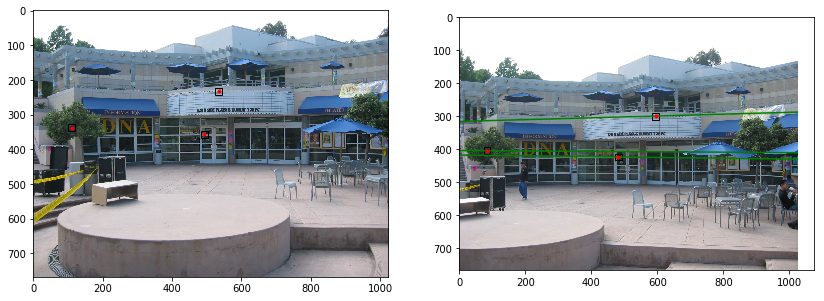

In [95]:
import random

#Sample 3 distinct points
pts1_out = set(inliers) # mannually select point in image, which not in inliers set, 
# here I just skip that using inliers to show result

idx = random.sample(pts1_out,3)
# idx = [137, 279, 278]
#Compute corresponding epipolar lines
l2 = F_LM @ Homogenize(pts1[:,idx])

# display the results
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)


for i in range(3):
    pt1_x = pts1[0,idx[i]]
    pt2_x = pts2[0,idx[i]]
    
    pt1_y = pts1[1,idx[i]]
    pt2_y = pts2[1,idx[i]]
    
    k = -1.0*l2[0,i]/l2[1,i]
    x = np.linspace(0, I2.shape[1])
    
    y = k*x - 1.0*l2[2,i]/l2[1,i]
    
    ax1.plot(pt1_x, pt1_y,'.r')
    ax1.add_patch(patches.Rectangle((pt1_x-20/2,pt1_y-20/2),20,20, fill=False))
    
    ax2.plot(x, y,'-g')
    ax2.plot(pt2_x, pt2_y,'.r')
    ax2.add_patch(patches.Rectangle((pt2_x-20/2,pt2_y-20/2),20,20, fill=False))
plt.show()

## Problem 8 (Programming): Projective to Euclidean Reconstruction (15 points)

You are given a Matlab file containing points obtained from applying three-view geometry techniques (using the trifocal tensor) to obtain a projective reconstruction of points from a 3D scene. Also in the file are groundtruth control points. Compute the homography transformation using the DLT along with the projected 3D scene points and control points to upgrade the projective reconstruction to a Euclidean reconstruction. Render the scene, and comment on your results. What does the scene look like? (You may have to rotate the plot to get a better view.)

EDIT:
Sorry; we'll be revising the text of problem 8, as it does not state how the 6 3D control points in Euclidean space are related to 10000 3D points reconstructed up to a 3D projective transformation. So you don't have to wait for the revised text.

The 6 3D control points in Euclidean space correspond to the first 6 3D points reconstructed up to a 3D projective transformation. From the 6 3D point correspondences, estimate the 3D projective transformation (using the DLT algorithm with data normalization) that maps the projectively reconstructed points to the Euclidean space of the control points. Then, apply the transformation to all 10000 projectively reconstructed points, mapping all of them to the Euclidean space of the control points.

In [111]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio


def Normalize(pts):
    # data normalization of n dimensional pts
    #
    # Input:
    #    pts - is in inhomogeneous coordinates
    # Outputs:
    #    pts - data normalized points
    #    T - corresponding transformation matrix
    """your code here"""
    num = pts.shape[0] # 3 or 2
    var_sum = np.sum(np.var(pts, axis=1)) # sum(varx, vary, varz) or sum(varx, vary)
    mean = np.mean(pts, axis=1) # ux, uy, uz or ux, uy
    s = np.sqrt(num/var_sum)
    
    T = np.eye(pts.shape[0]+1)
    
    diag_s = np.eye(pts.shape[0]) * s
    T[0:num, 0:num] = diag_s
    T[0:-1, -1] = -mean * s
    
    pts_homog = Homogenize(pts) # make pts from inhomog to homog
    pts = Dehomogenize(T.dot(pts_homog)) # normalized inhomog pts
    return pts, T


reconstruction = sio.loadmat('ereconstruction.mat')
X_projective = reconstruction['X_projective'] # projective space
X_projective = X_projective.T
X_control = reconstruction['X_c'] # Euclidean space
X_control = X_control.T

[[-5.48765664e-02  3.12035929e-03 -1.73086640e-03  7.19900184e-01]
 [-3.83378549e-03 -4.77178900e-02 -2.74414455e-03  1.02383068e+00]
 [-1.13059438e-04  1.24745032e-04 -5.22562474e-02  2.70268245e-02]
 [ 1.17328143e-05 -9.31248713e-06  3.89963821e-05  5.07101649e-01]]


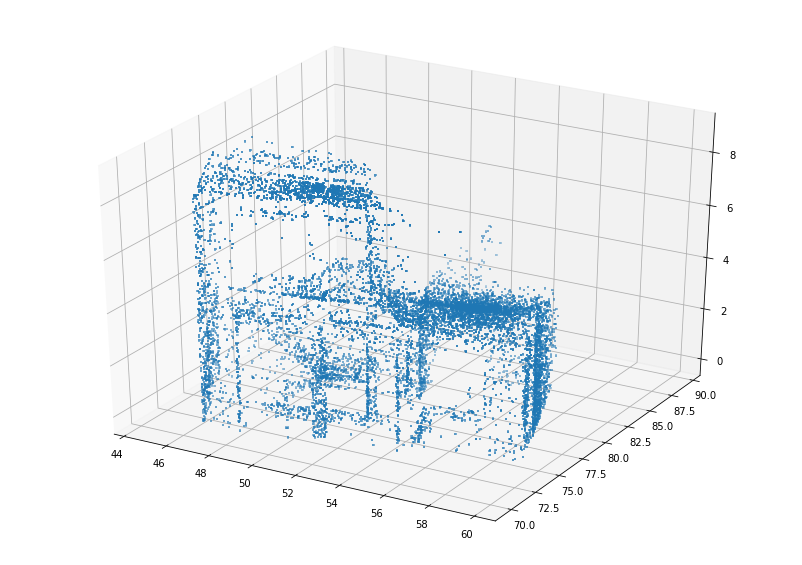

In [112]:
def ComputeHomography(Xp, Xc):
    """your code here"""
    num_pts = x1.shape[1]
    Xp_nmd, Tp = Normalize(Dehomogenize(Xp))
    Xc_nmd, Tc = Normalize(Dehomogenize(Xc))
    
    x1_nmd_homog = Homogenize(Xp_nmd) # nmd normalized
    x2_nmd_homog = Homogenize(Xc_nmd)
    
    x2_nmd_norm = np.linalg.norm(x2_nmd_homog, axis=0) # 1* 155
    sign = np.sign(x2_nmd_homog[0,:]) # 155
    e1 = np.array([1, 0, 0, 0])[:, None]
    v = x2_nmd_homog + sign * x2_nmd_norm * e1 # 3 * 155
    I = np.eye(x2_nmd_homog.shape[0])
    
    A = np.zeros((2 * x2.shape[1], x2_nmd_homog.shape[0] * x1_nmd_homog.shape[0])) # (2*155) * 9
    for i in range(v.shape[1]):
        v_i = v[:, i] [:, None] # 3*1
        Hv_i = I - 2 * v_i.dot(v_i.T)/(v_i.T.dot(v_i))
        leftNullSpace = Hv_i[1:, :] * 1 # 2* 3 leftnull space of one x2_nmd_homog
        A[3*i : 3*i + 3 , :] = np.kron(leftNullSpace, x1_nmd_homog[:, i].reshape(-1))
    
    _,S,VH = np.linalg.svd(A)    
    H_vector = VH[-1, :]
    H = H_vector.reshape((4, 4)) # row wise
    
  
    H = np.linalg.inv(Tc) @ H @ Tp # origin pixel frame
    print(H)
    return H




H = ComputeHomography(X_projective[:, :6], X_control)
X_euclidean = Dehomogenize(H @ X_projective)
Xe, Ye, Ze = X_euclidean[0,:], X_euclidean[1,:], X_euclidean[2,:] 
fig = plt.figure(figsize=(14, 10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(Xe, Ye, Ze, marker="+", s=5)
plt.show()